

# Multiple Linear Regression


## Objectives


-   Use scikit-learn to implement Multiple Linear Regression
-   Create a model, train,test and use the model


## Problem: 
**To create a MLR model that can predict the CO2 emission from the vehicle based on some given parameters (Engine Size, no of cylinders, fuel consumption, etc).**

### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("F:\\Skill Develpmn\\CB\\FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have  a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUELTYPE** e.g. z
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


Now lets select some features that we want to use for regression.


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Lets plot Emission values with respect to Engine size:


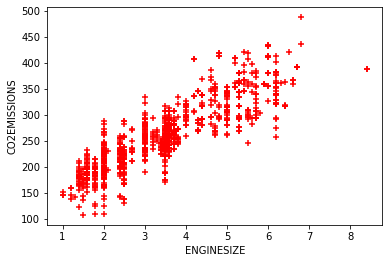

In [4]:
%matplotlib inline
plt.xlabel('ENGINESIZE') 
plt.ylabel('CO2EMISSIONS')
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color = 'red', marker = '+')

Clearly, as CO2EMISSIONS is linearly increasing with the increase in engine Size.

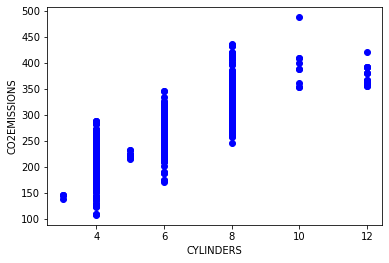

In [6]:
%matplotlib inline
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')

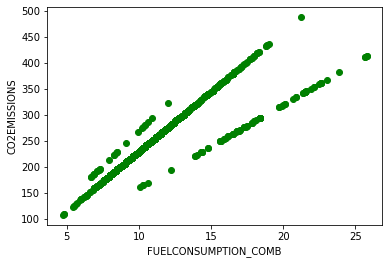

In [7]:
%matplotlib inline
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'green')

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, we train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.

In [13]:
msk = np.random.rand(len(df)) < 0.8   #parting the whole domain into 80:20 for training and testing set later.
msk[:10]

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True])

In [14]:
type(msk)

numpy.ndarray

In [15]:
msk.ndim

1

In [22]:
train = cdf[msk]
test = cdf[~msk]
test.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
8,3.7,6,13.4,9.5,11.6,267
10,2.4,4,11.2,8.1,9.8,225
19,2.0,4,9.9,7.4,8.8,202


#### Train data distribution


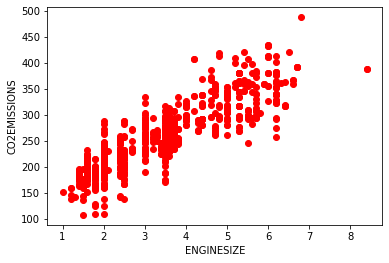

In [23]:
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = 'red')

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.


In [25]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [26]:
reg.fit(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']],train[['CO2EMISSIONS']])

LinearRegression()

In [27]:
reg.coef_

array([[10.41022488,  7.39696127,  9.88270739]])

In [28]:
reg.intercept_

array([64.05759181])

#The model can also be trained in this manner:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
#The coefficients
print ('Coefficients: ', regr.coef_)

As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain **Ordinary Least Squares method** to solve this problem.**

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

```
- Solving the model parameters analytically using closed-form equations
- Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)
```


<h2 id="prediction">Prediction</h2>


In [29]:
y_hat= reg.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
type(y_hat)

numpy.ndarray

In [36]:
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

#Mean Square Error
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % reg.score(x, y))

Residual sum of squares: 516.66
Variance score: 0.8601


**explained variance regression score:**  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$  
The best possible score is 1.0, lower values are worse.


## Problem: Using more Indep variables(features) mean more accuracy in Multiple Reg?
To understand this, we use a multiple linear regression with the same dataset but this time use __FUEL CONSUMPTION in CITY__ and 
__FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB and see for ourself if it does or doesn't result in better accuracy?


In [32]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print('The coefficeints are:', regr.coef_)
print('The intercept is : ', regr.intercept_)

The coefficeints are: [[10.4692814   7.12263824  6.15984202  3.48008949]]
The intercept is :  [65.01157354]


In [39]:
y1_cap = regr.predict(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

#Mean Square Error
mse = np.mean((y1_cap-y)**2)
print("The residual sum of squares or MSE is : %.3f" %mse)
print('The Variance score is : %.4f' % regr.score(x, y))

The residual sum of squares or MSE is : 515.948
The Variance score is : 0.8603


In this case as the number of Indep variable increased, the accuracy is increased( MSE decreased and variance score moved closer to 1). But it is not always true, sometimes increasing the features result in decrement of accuracy too.